In [61]:
import cv2  # OpenCV library for computer vision tasks
import numpy as np  # NumPy library for numerical operations
from IPython.display import display, clear_output
import matplotlib.pyplot as plt


In [67]:
image_directory = "C:\\Users\\Model\\cats_dogs\\cat\\12.jpg"
print(f"Image directory set to: {image_directory}")

Image directory set to: C:\Users\Model\cats_dogs\cat\12.jpg


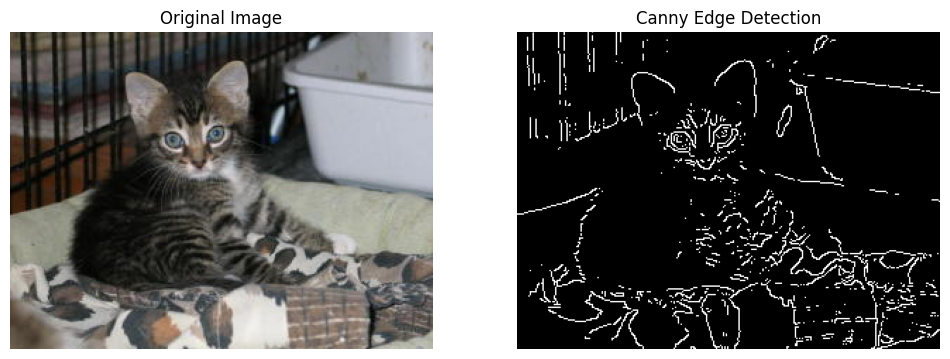

In [69]:
# Load the image
image = cv2.imread(image_directory)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray_image, 250, 250)

# Convert the original image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image_rgb)
axes[0].set_title("Original Image")
axes[0].axis('off')  # Hide the axis

# Display the edges
axes[1].imshow(edges, cmap='gray')
axes[1].set_title("Canny Edge Detection")
axes[1].axis('off')  # Hide the axis

# Show the plot
plt.show()

In [64]:
video_capture = cv2.VideoCapture(0)  # 0 for default webcam
if not video_capture.isOpened():
    print("Error: Could not open video source.")
else:
    print("Video source opened successfully.")

Video source opened successfully.


In [65]:
def apply_canny_edge_detection(frame, low_threshold=50, high_threshold=150):
    """
    Apply Canny Edge Detection on the given frame.
    
    Parameters:
    - frame: The input image frame on which to apply edge detection.
    - low_threshold: The lower threshold for the hysteresis procedure.
    - high_threshold: The upper threshold for the hysteresis procedure.
    
    Returns:
    - edges: The output image with edges detected.
    """
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blurred_frame = cv2.GaussianBlur(gray_frame, (5, 5), 1.4)
    edges = cv2.Canny(blurred_frame, low_threshold, high_threshold)
    return edges

In [66]:
try:
    while True:
        ret, frame = video_capture.read()
        
        if not ret:
            print("Error: Could not read frame.")
            break
        
        edges = apply_canny_edge_detection(frame)
        
        cv2.imshow('Canny Edge Detection', edges)
        
        if cv2.waitKey(1) & 0xFF == ord('q') or cv2.getWindowProperty('Canny Edge Detection', cv2.WND_PROP_VISIBLE) < 1:
            break
except KeyboardInterrupt:
    print("Stream stopped manually.")
finally:
    video_capture.release()
    cv2.destroyAllWindows()
    print("Video capture released and windows closed.")

Video capture released and windows closed.
